# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [2]:
df=pd.read_csv('/content/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


**Find the dataset information and observe the datatypes.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

**Check the shape of the data to understand its structure.**

In [4]:
df.shape

(12316, 32)

**View the the data with various functions to get an initial sense of the data.**

In [5]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
7416,14:23:00,Wednesday,18-30,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Unknown,...,Moving Backward,Pedestrian,Male,Over 51,3,Self-employed,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the left,Slight Injury
693,8:58:00,Friday,31-50,Unknown,Elementary school,Employee,1-2yr,NaN,Owner,2-5yrs,...,Going straight,Pedestrian,Female,18-30,3,Driver,NaN,Not a Pedestrian,No distancing,Serious Injury
713,18:25:00,Wednesday,18-30,Unknown,High school,Owner,Above 10yr,Pick up upto 10Q,Owner,NaN,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
10758,13:54:00,Saturday,18-30,Male,Junior high school,Employee,NaN,Other,Owner,2-5yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Turnover,Serious Injury
1848,20:44:00,Friday,31-50,Male,Junior high school,Employee,1-2yr,Pick up upto 10Q,Owner,Unknown,...,Going straight,na,na,na,na,Employee,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
9270,23:40:00,Friday,18-30,Male,NaN,NaN,NaN,Automobile,Owner,2-5yrs,...,Other,na,na,na,na,NaN,NaN,Not a Pedestrian,No distancing,Slight Injury
5484,17:42:00,Thursday,Over 51,Male,Junior high school,Employee,1-2yr,Long lorry,Owner,Below 1yr,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury
5942,0:43:00,Thursday,Unknown,Female,Junior high school,Owner,5-10yr,Automobile,Organization,1-2yr,...,Going straight,Pedestrian,Female,5,3,Driver,Normal,Unknown or other,Moving Backward,Slight Injury
8210,9:02:00,Monday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,NaN,NaN,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the right,Serious Injury
5766,13:13:00,Wednesday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,Unknown,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury


In [6]:
df.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


In [7]:
df.dtypes

,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


**Check for null values.**

In [8]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


**Check for duplicated values.**

In [9]:
df.duplicated().sum()

0

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

**Handling Missing Values**

In [10]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [11]:
print(df.groupby('Educational_level').size())
print(df['Educational_level'].str.split().str[0].unique())

Educational_level
Above high school      362
Elementary school     2163
High school           1110
Illiterate              45
Junior high school    7619
Unknown                100
Writing & reading      176
dtype: int64
['Above' 'Junior' nan 'Elementary' 'High' 'Unknown' 'Illiterate' 'Writing']


In [12]:
df['Educational_level'] = df['Educational_level'].replace('Unknown', np.nan)
df['Educational_level'] = df['Educational_level'].replace('nan', np.nan)
df['Educational_level'] = df['Educational_level'].fillna(df['Educational_level'].mode().iloc[0])

In [13]:
print(df.groupby('Vehicle_driver_relation').size())
print(df['Vehicle_driver_relation'].str.split().str[0].unique())

Vehicle_driver_relation
Employee    9627
Other        123
Owner       1973
Unknown       14
dtype: int64
['Employee' 'Unknown' 'Owner' nan 'Other']


In [14]:
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].replace('Unknown', np.nan)
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].replace('nan', np.nan)
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode().iloc[0])

In [15]:
print(df.groupby('Driving_experience').size())
print(df['Driving_experience'].str.split().str[0].unique())

Driving_experience
1-2yr         1756
2-5yr         2613
5-10yr        3363
Above 10yr    2262
Below 1yr     1342
No Licence     118
unknown         33
dtype: int64
['1-2yr' 'Above' '5-10yr' '2-5yr' nan 'No' 'Below' 'unknown']


In [16]:
df['Driving_experience'] = df['Driving_experience'].str.replace('yr', '', regex=False)

In [17]:
print(df['Driving_experience'].str.split().str[0].unique())

['1-2' 'Above' '5-10' '2-5' nan 'No' 'Below' 'unknown']


In [18]:
df['Driving_experience'] = df['Driving_experience'].replace('unknown', np.nan)
df['Driving_experience'] = df['Driving_experience'].replace('nan', np.nan)
df['Driving_experience'] = df['Driving_experience'].fillna(df['Driving_experience'].mode().iloc[0])

In [19]:
print(df.groupby('Type_of_vehicle').size())
print(df['Type_of_vehicle'].str.split().str[0].unique())

Type_of_vehicle
Automobile              3205
Bajaj                     29
Bicycle                   21
Long lorry               383
Lorry (11?40Q)           541
Lorry (41?100Q)         2186
Motorcycle               177
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Public (13?45 seats)     532
Public (> 45 seats)      404
Ridden horse              76
Special vehicle           84
Stationwagen             687
Taxi                     265
Turbo                     46
dtype: int64
['Automobile' 'Public' 'Lorry' nan 'Long' 'Taxi' 'Pick' 'Stationwagen'
 'Ridden' 'Other' 'Bajaj' 'Turbo' 'Motorcycle' 'Special' 'Bicycle']


In [20]:
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.replace(' (11?40Q)', '', regex=False)
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.replace(' (41?100Q)', '', regex=False)
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.replace(' (12 seats)', '', regex=False)
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.replace(' (13?45 seats)', '', regex=False)
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.replace(' (> 45 seats)', '', regex=False)

In [21]:
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace('nan', np.nan)
df['Type_of_vehicle'] = df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode().iloc[0])

In [22]:
print(df.groupby('Owner_of_vehicle').size())
print(df['Owner_of_vehicle'].str.split().str[0].unique())

Owner_of_vehicle
Governmental     1041
Organization      312
Other              22
Owner           10459
dtype: int64
['Owner' 'Governmental' nan 'Organization' 'Other']


In [23]:
df['Owner_of_vehicle'] = df['Owner_of_vehicle'].replace('nan', np.nan)
df['Owner_of_vehicle'] = df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode().iloc[0])

In [24]:
print(df.groupby('Service_year_of_vehicle').size())
print(df['Service_year_of_vehicle'].str.split().str[0].unique())

Service_year_of_vehicle
1-2yr          827
2-5yrs        1792
5-10yrs       1280
Above 10yr    1324
Below 1yr      282
Unknown       2883
dtype: int64
['Above' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below']


In [25]:
print(df['Service_year_of_vehicle'].str.split().str[0].unique())

['Above' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below']


In [26]:
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].replace('Unknown', np.nan)
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].replace('nan', np.nan)
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].fillna(df['Service_year_of_vehicle'].mode().iloc[0])

In [27]:
print(df.groupby('Defect_of_vehicle').size())
print(df['Defect_of_vehicle'].str.split().str[0].unique())

Defect_of_vehicle
5              36
7              76
No defect    7777
dtype: int64
['No' nan '7' '5']


In [28]:
df['Defect_of_vehicle'] = df['Defect_of_vehicle'].replace('nan', np.nan)
df['Defect_of_vehicle'] = df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode().iloc[0])

In [29]:
df['Defect_of_vehicle'] = df['Defect_of_vehicle'].replace('No defect', '0')

In [30]:
df['Defect_of_vehicle'] = df['Defect_of_vehicle'].astype(int)

In [31]:
print(df.groupby('Area_accident_occured').size())
print(df['Area_accident_occured'].str.split().str[0].unique())

Area_accident_occured
  Market areas                       63
  Recreational areas                327
 Church areas                      1060
 Hospital areas                     121
 Industrial areas                   456
 Outside rural areas                218
Office areas                       3451
Other                              3819
Recreational areas                    1
Residential areas                  2060
Rural village areas                  44
Rural village areasOffice areas      20
School areas                        415
Unknown                              22
dtype: int64
['Residential' 'Office' 'Recreational' 'Industrial' nan 'Other' 'Church'
 'Market' 'Unknown' 'Rural' 'Outside' 'Hospital' 'School']


In [32]:
df['Area_accident_occured'] = df['Area_accident_occured'].replace('Unknown', np.nan)
df['Area_accident_occured'] = df['Area_accident_occured'].replace('nan', np.nan)
df['Area_accident_occured'] = df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode().iloc[0])

In [33]:
print(df.groupby('Lanes_or_Medians').size())
print(df['Lanes_or_Medians'].str.split().str[0].unique())

Lanes_or_Medians
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with broken lines road marking)    4411
Two-way (divided with solid lines road marking)      142
Undivided Two way                                   3796
Unknown                                               57
other                                               1660
dtype: int64
[nan 'Undivided' 'other' 'Double' 'One' 'Two-way' 'Unknown']


In [34]:
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].str.replace(' (divided with broken lines road marking)', '', regex=False)
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].str.replace(' (divided with solid lines road marking)', '', regex=False)
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].str.replace('Undivided Two way', 'Two-way', regex=False)

In [35]:
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].replace('Unknown', np.nan)
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].replace('nan', np.nan)
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode().iloc[0])

In [36]:
print(df.groupby('Road_allignment').size())
print(df['Road_allignment'].str.split().str[0].unique())

Road_allignment
Escarpments                                        113
Gentle horizontal curve                            163
Sharp reverse curve                                 57
Steep grade downward with mountainous terrain      429
Steep grade upward with mountainous terrain         19
Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Tangent road with mountainous terrain and          396
Tangent road with rolling terrain                   37
dtype: int64
['Tangent' nan 'Escarpments' 'Gentle' 'Steep' 'Sharp']


In [37]:
df['Road_allignment'] = df['Road_allignment'].replace('nan', np.nan)
df['Road_allignment'] = df['Road_allignment'].fillna(df['Road_allignment'].mode().iloc[0])

In [38]:
print(df.groupby('Types_of_Junction').size())
print(df['Types_of_Junction'].str.split().str[0].unique())

Types_of_Junction
Crossing       2177
No junction    3837
O Shape         164
Other           445
T Shape          60
Unknown         191
X Shape          12
Y Shape        4543
dtype: int64
['No' 'Y' 'Crossing' 'O' 'Other' 'Unknown' 'T' 'X' nan]


In [39]:
df['Types_of_Junction'] = df['Types_of_Junction'].replace('Unknown', np.nan)
df['Types_of_Junction'] = df['Types_of_Junction'].replace('nan', np.nan)
df['Types_of_Junction'] = df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode().iloc[0])

In [40]:
print(df.groupby('Road_surface_type').size())
print(df['Road_surface_type'].str.split().str[0].unique())

Road_surface_type
Asphalt roads                       11296
Asphalt roads with some distress       81
Earth roads                           358
Gravel roads                          242
Other                                 167
dtype: int64
['Asphalt' 'Earth' nan 'Gravel' 'Other']


In [41]:
df['Road_surface_type'] = df['Road_surface_type'].str.replace(' with some distress', '', regex=False)

In [42]:
df['Road_surface_type'] = df['Road_surface_type'].replace('nan', np.nan)
df['Road_surface_type'] = df['Road_surface_type'].fillna(df['Road_surface_type'].mode().iloc[0])

In [43]:
print(df.groupby('Type_of_collision').size())
print(df['Type_of_collision'].str.split().str[0].unique())

Type_of_collision
Collision with animals                      171
Collision with pedestrians                  896
Collision with roadside objects            1786
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Rollover                                    397
Unknown                                      14
Vehicle with vehicle collision             8774
With Train                                    9
dtype: int64
['Collision' 'Vehicle' 'Other' 'Rollover' 'Fall' 'With' 'Unknown' nan]


In [44]:
df['Type_of_collision'] = df['Type_of_collision'].replace('Unknown', np.nan)
df['Type_of_collision'] = df['Type_of_collision'].replace('nan', np.nan)
df['Type_of_collision'] = df['Type_of_collision'].fillna(df['Type_of_collision'].mode().iloc[0])

In [45]:
print(df.groupby('Vehicle_movement').size())
print(df['Vehicle_movement'].str.split().str[0].unique())

Vehicle_movement
Entering a junction     193
Getting off             339
Going straight         8158
Moving Backward         985
Other                   937
Overtaking               96
Parked                   10
Reversing               563
Stopping                 61
Turnover                489
U-Turn                   50
Unknown                  88
Waiting to go            39
dtype: int64
['Going' 'U-Turn' 'Moving' 'Turnover' 'Waiting' 'Getting' 'Reversing'
 'Unknown' 'Parked' 'Stopping' 'Overtaking' 'Other' 'Entering' nan]


In [46]:
df['Vehicle_movement'] = df['Vehicle_movement'].replace('Unknown', np.nan)
df['Vehicle_movement'] = df['Vehicle_movement'].replace('nan', np.nan)
df['Vehicle_movement'] = df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode().iloc[0])

In [47]:
print(df.groupby('Work_of_casuality').size())
print(df['Work_of_casuality'].str.split().str[0].unique())

Work_of_casuality
Driver           5903
Employee          553
Other             463
Self-employed    2044
Student           103
Unemployed         33
Unknown            19
dtype: int64
[nan 'Driver' 'Other' 'Unemployed' 'Employee' 'Self-employed' 'Student'
 'Unknown']


In [48]:
df['Work_of_casuality'] = df['Work_of_casuality'].replace('Unknown', np.nan)
df['Work_of_casuality'] = df['Work_of_casuality'].replace('nan', np.nan)
df['Work_of_casuality'] = df['Work_of_casuality'].fillna(df['Work_of_casuality'].mode().iloc[0])

In [49]:
print(df.groupby('Fitness_of_casuality').size())
print(df['Fitness_of_casuality'].str.split().str[0].unique())

Fitness_of_casuality
Blind             18
Deaf              18
Normal          9608
NormalNormal      19
Other             18
dtype: int64
[nan 'Normal' 'Deaf' 'Other' 'Blind' 'NormalNormal']


In [50]:
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].str.replace('NormalNormal', 'Normal', regex=False)

In [51]:
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].replace('nan', np.nan)
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].fillna(df['Fitness_of_casuality'].mode().iloc[0])

In [52]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

# Sex_of_driver Distribution

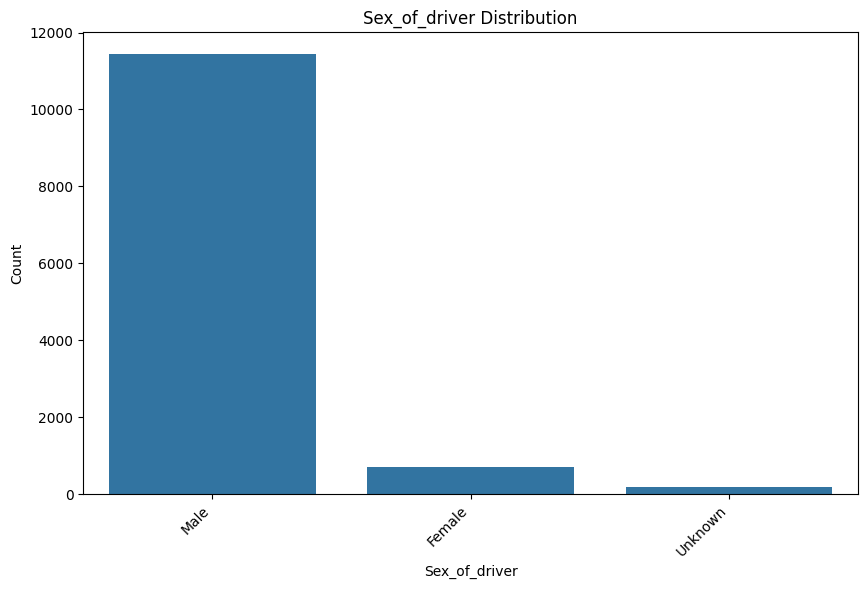

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex_of_driver', data=df)
plt.title('Sex_of_driver Distribution')
plt.xlabel('Sex_of_driver')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Drop the Unknown For M and F

In [54]:
df['Sex_of_driver'] = df['Sex_of_driver'].replace('Unknown', np.nan)
df.dropna(subset=['Sex_of_driver'], inplace=True)

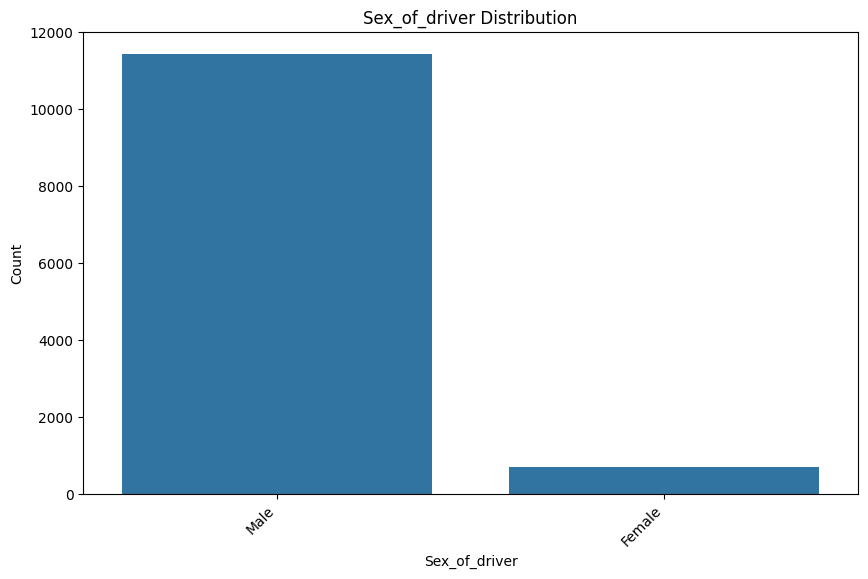

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex_of_driver', data=df)
plt.title('Sex_of_driver Distribution')
plt.xlabel('Sex_of_driver')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Cause_of_accident Distribution

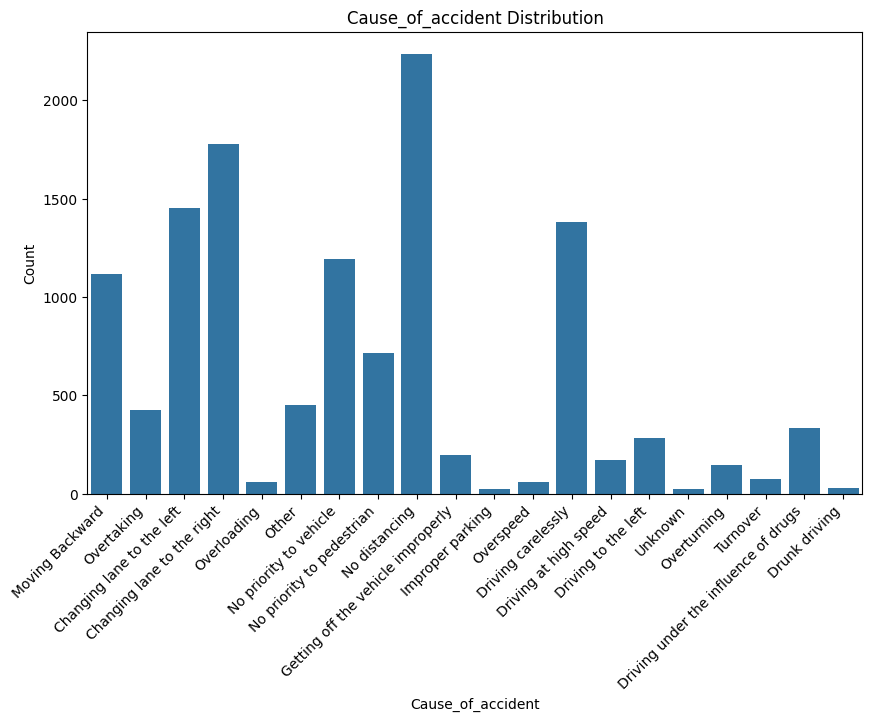

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cause_of_accident', data=df)
plt.title('Cause_of_accident Distribution')
plt.xlabel('Cause_of_accident')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

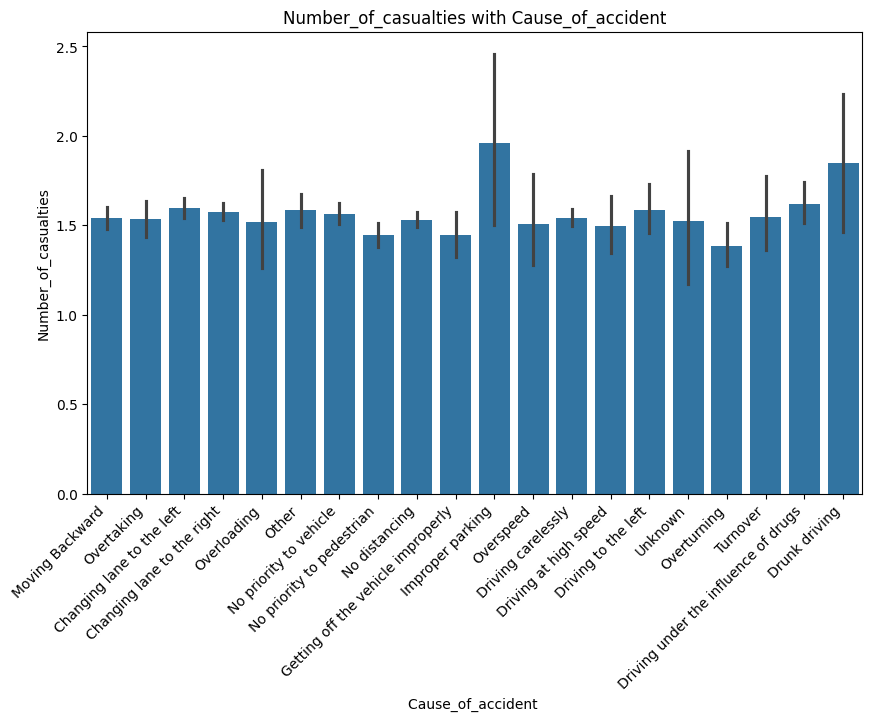

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cause_of_accident', y='Number_of_casualties', data=df)
plt.title('Number_of_casualties with Cause_of_accident')
plt.xlabel('Cause_of_accident ')
plt.ylabel('Number_of_casualties')
plt.xticks(rotation=45, ha='right')
plt.show()

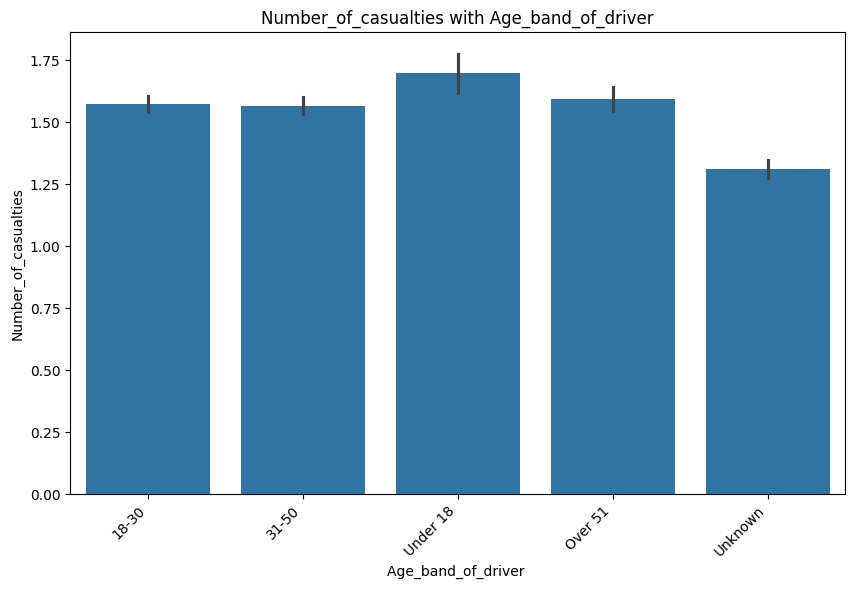

In [58]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Age_band_of_driver', y='Number_of_casualties', data=df)
plt.title('Number_of_casualties with Age_band_of_driver')
plt.xlabel('Age_band_of_driver ')
plt.ylabel('Number_of_casualties')
plt.xticks(rotation=45, ha='right')
plt.show()

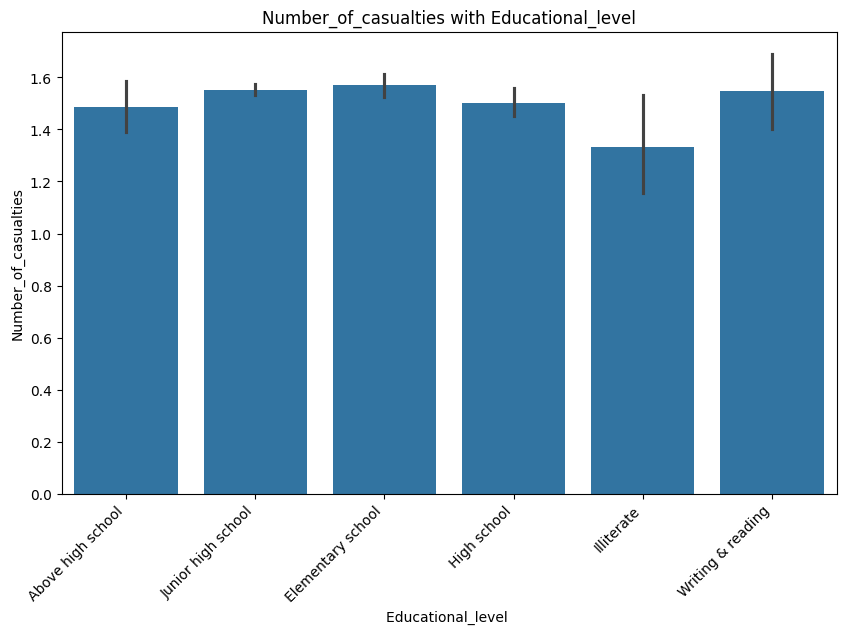

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Educational_level', y='Number_of_casualties', data=df)
plt.title('Number_of_casualties with Educational_level')
plt.xlabel('Educational_level ')
plt.ylabel('Number_of_casualties')
plt.xticks(rotation=45, ha='right')
plt.show()

# Correlation between Number_of_vehicles_involved and Number_of_casualties

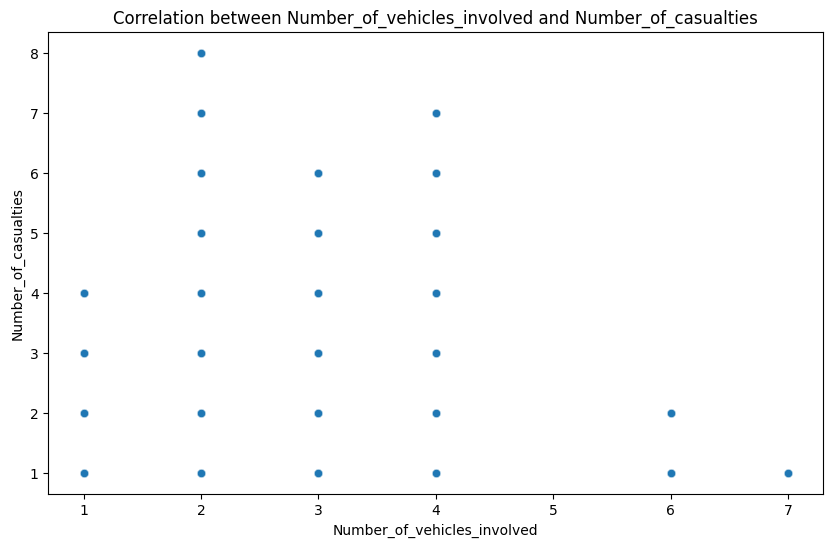

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number_of_vehicles_involved', y='Number_of_casualties', alpha=0.5)
plt.title('Correlation between Number_of_vehicles_involved and Number_of_casualties')
plt.xlabel('Number_of_vehicles_involved')
plt.ylabel('Number_of_casualties')
plt.show()


**Types of Type_of_vehicle with the most accidents**

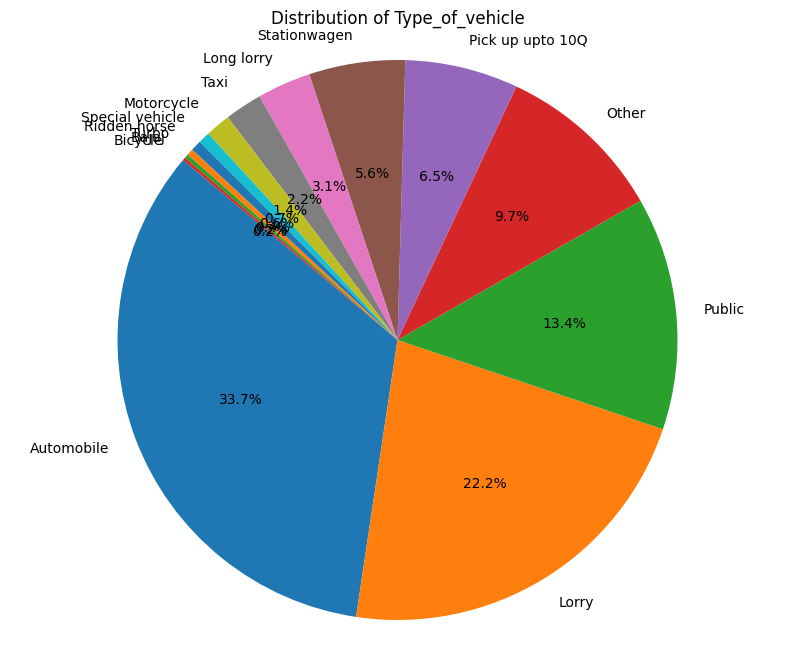

In [61]:
Type_of_vehicle = df['Type_of_vehicle'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(Type_of_vehicle, labels=Type_of_vehicle.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Type_of_vehicle')
plt.axis('equal')
plt.show()

# **one-hot encode**

In [62]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder

# # List of columns to encode
# columns_to_encode = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
#     'Educational_level', 'Driving_experience', 'Type_of_vehicle',
#     'Vehicle_movement', 'Cause_of_accident']

# # Initialize OneHotEncoder
# ohe = OneHotEncoder(sparse_output=False)

# # Create a list to store encoded dataframes
# encoded_dfs = []

# # Loop through columns and encode each one
# for col in columns_to_encode:
#     # Fit and transform the column
#     encoded = ohe.fit_transform(df[[col]])
#     # Create a DataFrame with the encoded features
#     encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out([col]))
#     # Append the DataFrame to the list
#     encoded_dfs.append(encoded_df)

# # Drop the original columns
# df.drop(columns=columns_to_encode, inplace=True)

# # Concatenate the original DataFrame with the encoded DataFrames
# df_one_hot = pd.concat([df] + encoded_dfs, axis=1)

# # Optional: If you have specific columns to drop, do so here
# # df_one_hot.drop(['Name', 'Location'], axis=1, inplace=True) # Uncomment if needed

# # Update the original DataFrame with the one-hot encoded version
# df = df_one_hot
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# List of columns to encode
columns_to_encode =columns_to_encode = [
    'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation',
    'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
    'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
    'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
    'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved',
    'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
    'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality',
    'Pedestrian_movement', 'Cause_of_accident'
]
# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='if_binary')

# Create a list to store encoded dataframes
encoded_dfs = []

# Loop through columns and encode each one
for col in columns_to_encode:
    # Fit and transform the column
    encoded = ohe.fit_transform(df[[col]])
    # Create a DataFrame with the encoded features
    encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out([col]))
    # Append the DataFrame to the list
    encoded_dfs.append(encoded_df)

# Drop the original columns
df.drop(columns=columns_to_encode, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrames
df_one_hot = pd.concat([df] + encoded_dfs, axis=1)

# Update the original DataFrame with the one-hot encoded version
df = df_one_hot


In [63]:
df.head()

,Time,Accident_severity,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_18-30,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,17:02:00,Slight Injury,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17:02:00,Slight Injury,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,17:02:00,Serious Injury,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1:06:00,Slight Injury,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1:06:00,Slight Injury,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [64]:
df.shape

(12315, 201)

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [65]:
from sklearn.model_selection import train_test_split

X = df.drop(['Accident_severity','Time'], axis=1)
y = df['Accident_severity']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

In [66]:
df.isnull().sum

<bound method DataFrame.sum of         Time  Accident_severity  Day_of_week_Friday  Day_of_week_Monday  \
0      False              False               False               False   
1      False              False               False               False   
2      False              False               False               False   
3      False              False               False               False   
4      False              False               False               False   
...      ...                ...                 ...                 ...   
10568   True               True               False               False   
10649   True               True               False               False   
10787   True               True               False               False   
10852   True               True               False               False   
11121   True               True               False               False   

       Day_of_week_Saturday  Day_of_week_Sunday  Day_of_week_Thursday  \
0                     False               False                 False   
1                     False               False                 False   
2                     False               False                 False   
3                     False               False                 False   
4                     False               False                 False   
...                     ...                 ...                   ...   
10568                 False               False                 False   
10649                 False               False                 False   
10787                 False               False                 False   
10852                 False               False                 False   
11121                 False               False                 False   

       Day_of_week_Tuesday  Day_of_week_Wednesday  Age_band_of_driver_18-30  \
0                    False                  False                     False   
1                    False                  False                     False   
2                    False                  False                     False   
3                    False                  False                     False   
4                    False                  False                     False   
...                    ...                    ...                       ...   
10568                False                  False                     False   
10649                False                  False                     False   
10787                False                  False                     False   
10852                False                  False                     False   
11121                False                  False                     False   

       ...  Cause_of_accident_No distancing  \
0      ...                            False   
1      ...                            False   
2      ...                            False   
3      ...                            False   
4      ...                            False   
...    ...                              ...   
10568  ...                            False   
10649  ...                            False   
10787  ...                            False   
10852  ...                            False   
11121  ...                            False   

       Cause_of_accident_No priority to pedestrian  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   
...                                            ...   
10568                                        False   
10649                                        False   
10787                                        False   
10852                                        False   
11121                                        False   

       Cause_of_accident_No 

In [67]:
# Combine features and target into a single DataFrame for easier manipulation
train_df = pd.concat([X_train, y_train], axis=1)

# Drop rows with any missing values
train_df_clean = train_df.dropna()

# Separate features and target after dropping
X_train_clean = train_df_clean.drop(columns=[y_train.name])
y_train_clean = train_df_clean[y_train.name]

# Repeat for the test set if needed
test_df = pd.concat([X_test, y_test], axis=1)
test_df_clean = test_df.dropna()
X_test_clean = test_df_clean.drop(columns=[y_test.name])
y_test_clean = test_df_clean[y_test.name]

#### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
lr_y_pred = lr_model.predict(X_test)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt_model.predict(X_test)



#### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
svm_y_pred = svm_model.predict(X_test)

#### K-Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the K-Neighbors model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
knn_y_pred = knn_model.predict(X_test)


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [ ]:

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_report = classification_report(y_test, lr_y_pred)

print("Logistic Regression")
print(f"Accuracy: {lr_accuracy:.4f}")
print("Classification Report:")
print(lr_report)

In [ ]:
# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)

print("Decision Tree Classifier")
print(f"Accuracy: {dt_accuracy:.4f}")
print("Classification Report:")
print(dt_report)

In [ ]:


# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)

print("Support Vector Machine")
print(f"Accuracy: {svm_accuracy:.4f}")
print("Classification Report:")
print(svm_report)

In [ ]:

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred)

print("K-Neighbors Classifier")
print(f"Accuracy: {knn_accuracy:.4f}")
print("Classification Report:")
print(knn_report)


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: